# Figure 8

**Figure 8.** Impact of ice-optical parameterization on time- and domain-averaged CRH in the three WCB regions. The CRH differences are
calculated between the radiative transfer calculations with the ice schemes of Fu and Baum (Fu - Baum). The differences between Fu and
Baum with general habit mixture (ghm), solid column (sc), and rough-aggregated (ra) habits are shown with solid lines, dashed lines, and
dotted lines, as is indicated in the legend.

---
@ Behrooz Keshtgar, KIT 2024

## 1- load python packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import colorlegend
import warnings
warnings.filterwarnings("ignore")

For reference, print package versions to screen:

In [3]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.23.5
matplotlib: 3.3.0


**Since datasets are large, I use DASK to speed up my analysis**

In [4]:
import dask
from dask.distributed import Client, progress, wait
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
client = Client()
client

<Client: 'tcp://127.0.0.1:42425' processes=16 threads=256, memory=522.84 GB>

## 2- Loading datasets

In [6]:
# Dictionary for loading datasets for the 4 LEM domains
domdict = {
         'WCB_ascent'               : {'res':'300m'}, 
         'WCB_cyclonic_outflow'     : {'res':'300m'}, 
         'WCB_anticyclonic_outflow' : {'res':'300m'}
          }

In [7]:
# Loading icon-pp datasets
def load_data(optic):
    list_icon = []
    for dom in list(domdict.keys()):
        path = '/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/'
        print('Working on loading data for', dom)
        ds = xr.open_dataset(path+dom+'/libradtran_pp_twostr_'+optic+'.nc').chunk(chunks={'time': 1, 'height': 10})
        list_icon.append(ds)
    return list_icon
#-------------------------------------------------------------------------------------------------
list_libradtran_fu       = load_data('Fu')
list_libradtran_baum_ghm = load_data('Baum_ghm')
list_libradtran_baum_sc  = load_data('Baum_sc')
list_libradtran_baum_rg  = load_data('Baum_rg')

Working on loading data for WCB_ascent
Working on loading data for WCB_cyclonic_outflow
Working on loading data for WCB_anticyclonic_outflow
Working on loading data for WCB_ascent
Working on loading data for WCB_cyclonic_outflow
Working on loading data for WCB_anticyclonic_outflow
Working on loading data for WCB_ascent
Working on loading data for WCB_cyclonic_outflow
Working on loading data for WCB_anticyclonic_outflow
Working on loading data for WCB_ascent
Working on loading data for WCB_cyclonic_outflow
Working on loading data for WCB_anticyclonic_outflow


## 3- Average profiles of CRH

In [9]:
# excluding boundaries and takin domain average
# twostr with Fu, Baum (ghm, sc, rg) datasets
for dom in range(len(list_libradtran_fu)):
    for var in ['lwcrh','swcrh']:
        list_libradtran_fu[dom][var+'_mean'] = list_libradtran_fu[dom][var].isel(lon=slice(10,list_libradtran_fu[dom].lon.size-10),lat=slice(5,list_libradtran_fu[dom].lat.size-5)).mean(dim=['lat','lon','time']).compute()
        list_libradtran_baum_ghm[dom][var+'_mean'] = list_libradtran_baum_ghm[dom][var].isel(lon=slice(10,list_libradtran_baum_ghm[dom].lon.size-10),lat=slice(5,list_libradtran_baum_ghm[dom].lat.size-5)).mean(dim=['lat','lon','time']).compute()
        list_libradtran_baum_sc[dom][var+'_mean'] = list_libradtran_baum_sc[dom][var].isel(lon=slice(10,list_libradtran_baum_sc[dom].lon.size-10),lat=slice(5,list_libradtran_baum_sc[dom].lat.size-5)).mean(dim=['lat','lon','time']).compute()
        list_libradtran_baum_rg[dom][var+'_mean'] = list_libradtran_baum_rg[dom][var].isel(lon=slice(10,list_libradtran_baum_rg[dom].lon.size-10),lat=slice(5,list_libradtran_baum_rg[dom].lat.size-5)).mean(dim=['lat','lon','time']).compute()

### For data publication

In [16]:
# creating a dataset and save for data publication
ds_out = xr.Dataset(
    data_vars={
        "swcrh_mean_fu_dom02"     : (list_libradtran_fu[0]['swcrh_mean'].dims, list_libradtran_fu[0]['swcrh_mean'].data),
        "lwcrh_mean_fu_dom02"     : (list_libradtran_fu[0]['lwcrh_mean'].dims, list_libradtran_fu[0]['lwcrh_mean'].data),
        "swcrh_mean_Baum_ghm_dom02" : (list_libradtran_baum_ghm[0]['swcrh_mean'].dims, list_libradtran_baum_ghm[0]['swcrh_mean'].data),
        "lwcrh_mean_Baum_ghm_dom02" : (list_libradtran_baum_ghm[0]['lwcrh_mean'].dims, list_libradtran_baum_ghm[0]['lwcrh_mean'].data),
        "swcrh_mean_Baum_sc_dom02" : (list_libradtran_baum_sc[0]['swcrh_mean'].dims, list_libradtran_baum_sc[0]['swcrh_mean'].data),
        "lwcrh_mean_Baum_sc_dom02" : (list_libradtran_baum_sc[0]['lwcrh_mean'].dims, list_libradtran_baum_sc[0]['lwcrh_mean'].data),
        "swcrh_mean_Baum_rg_dom02" : (list_libradtran_baum_rg[0]['swcrh_mean'].dims, list_libradtran_baum_rg[0]['swcrh_mean'].data),
        "lwcrh_mean_Baum_rg_dom02" : (list_libradtran_baum_rg[0]['lwcrh_mean'].dims, list_libradtran_baum_rg[0]['lwcrh_mean'].data),
        
        "swcrh_mean_fu_dom03"     : (list_libradtran_fu[1]['swcrh_mean'].dims, list_libradtran_fu[1]['swcrh_mean'].data),
        "lwcrh_mean_fu_dom03"     : (list_libradtran_fu[1]['lwcrh_mean'].dims, list_libradtran_fu[1]['lwcrh_mean'].data),
        "swcrh_mean_Baum_ghm_dom03" : (list_libradtran_baum_ghm[1]['swcrh_mean'].dims, list_libradtran_baum_ghm[1]['swcrh_mean'].data),
        "lwcrh_mean_Baum_ghm_dom03" : (list_libradtran_baum_ghm[1]['lwcrh_mean'].dims, list_libradtran_baum_ghm[1]['lwcrh_mean'].data),
        "swcrh_mean_Baum_sc_dom03" : (list_libradtran_baum_sc[1]['swcrh_mean'].dims, list_libradtran_baum_sc[1]['swcrh_mean'].data),
        "lwcrh_mean_Baum_sc_dom03" : (list_libradtran_baum_sc[1]['lwcrh_mean'].dims, list_libradtran_baum_sc[1]['lwcrh_mean'].data),
        "swcrh_mean_Baum_rg_dom03" : (list_libradtran_baum_rg[1]['swcrh_mean'].dims, list_libradtran_baum_rg[1]['swcrh_mean'].data),
        "lwcrh_mean_Baum_rg_dom03" : (list_libradtran_baum_rg[1]['lwcrh_mean'].dims, list_libradtran_baum_rg[1]['lwcrh_mean'].data),
        
        "swcrh_mean_fu_dom04"     : (list_libradtran_fu[2]['swcrh_mean'].dims, list_libradtran_fu[2]['swcrh_mean'].data),
        "lwcrh_mean_fu_dom04"     : (list_libradtran_fu[2]['lwcrh_mean'].dims, list_libradtran_fu[2]['lwcrh_mean'].data),
        "swcrh_mean_Baum_ghm_dom04" : (list_libradtran_baum_ghm[2]['swcrh_mean'].dims, list_libradtran_baum_ghm[2]['swcrh_mean'].data),
        "lwcrh_mean_Baum_ghm_dom04" : (list_libradtran_baum_ghm[2]['lwcrh_mean'].dims, list_libradtran_baum_ghm[2]['lwcrh_mean'].data),
        "swcrh_mean_Baum_sc_dom04" : (list_libradtran_baum_sc[2]['swcrh_mean'].dims, list_libradtran_baum_sc[2]['swcrh_mean'].data),
        "lwcrh_mean_Baum_sc_dom04" : (list_libradtran_baum_sc[2]['lwcrh_mean'].dims, list_libradtran_baum_sc[2]['lwcrh_mean'].data),
        "swcrh_mean_Baum_rg_dom04" : (list_libradtran_baum_rg[2]['swcrh_mean'].dims, list_libradtran_baum_rg[2]['swcrh_mean'].data),
        "lwcrh_mean_Baum_rg_dom04" : (list_libradtran_baum_rg[2]['lwcrh_mean'].dims, list_libradtran_baum_rg[2]['lwcrh_mean'].data), 
    },
    coords=list_libradtran_fu[0]['swcrh_mean'].coords)
ds_out = ds_out.assign(z_mc=list_libradtran_fu[0]['z_mc'])

ds_out.attrs['description'] = 'Vertical profiles of CRH from twostr radiation calculations with different ice-optics for each LEM domain'
ds_out.to_netcdf('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/for_publication/figure8.nc')

## 4- Plot

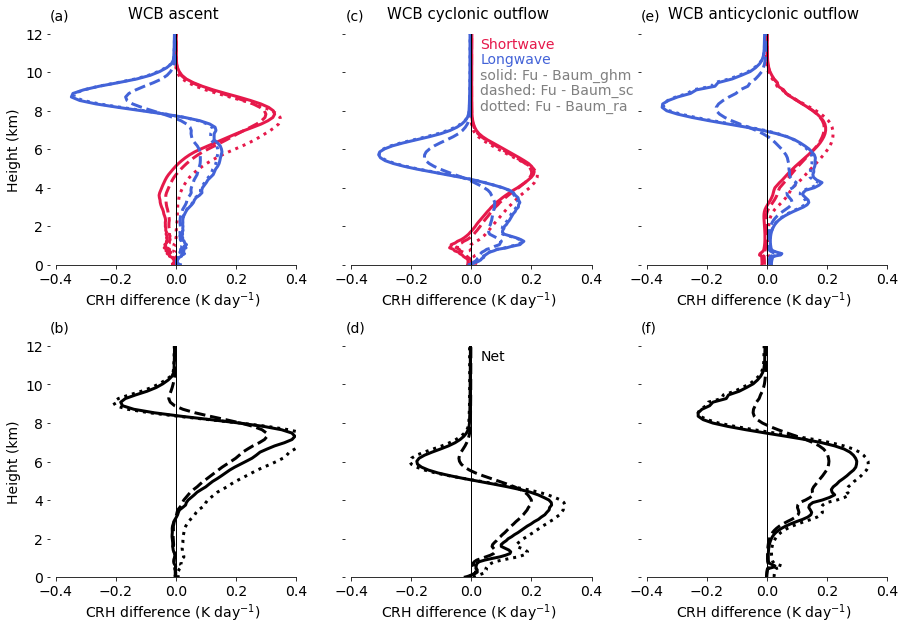

In [15]:
# plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
i = 0

z = ds_out['z_mc']

for ax in axes.flat:
    ax.tick_params(labelsize=14)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    
    if i == 0:
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_fu_dom02'].values - ds_out['lwcrh_mean_Baum_ghm_dom02'].values
        difflw_2 = ds_out['lwcrh_mean_fu_dom02'].values - ds_out['lwcrh_mean_Baum_sc_dom02'].values
        difflw_3 = ds_out['lwcrh_mean_fu_dom02'].values - ds_out['lwcrh_mean_Baum_rg_dom02'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_fu_dom02'].values - ds_out['swcrh_mean_Baum_ghm_dom02'].values
        diffsw_2 = ds_out['swcrh_mean_fu_dom02'].values - ds_out['swcrh_mean_Baum_sc_dom02'].values
        diffsw_3 = ds_out['swcrh_mean_fu_dom02'].values - ds_out['swcrh_mean_Baum_rg_dom02'].values
        
        
        ax.plot(diffsw_1,z,color='#e6194B',lw=3)
        ax.plot(diffsw_2,z,color='#e6194B',linestyle='dashed',lw=3)
        ax.plot(diffsw_3,z,color='#e6194B',linestyle='dotted',lw=3)

        ax.plot(difflw_1,z,color='#4363d8',lw=3)
        ax.plot(difflw_2,z,color='#4363d8',linestyle='dashed',lw=3)
        ax.plot(difflw_3,z,color='#4363d8',linestyle='dotted',lw=3)
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_title('WCB ascent', fontsize=15,pad=15)
        ax.set_ylabel('Height (km)', fontsize=14)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(a)', transform=ax.transAxes, 
            size=14)
        
        ax.set_ylim([0,12])
        
        ax.spines['bottom'].set_bounds(-0.4,0.4)
        ax.set_xticks(np.linspace(-0.4,0.4,5))
        ax.set_xlim([-0.42,0.4])
    
    if i == 1:
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_fu_dom03'].values - ds_out['lwcrh_mean_Baum_ghm_dom03'].values
        difflw_2 = ds_out['lwcrh_mean_fu_dom03'].values - ds_out['lwcrh_mean_Baum_sc_dom03'].values
        difflw_3 = ds_out['lwcrh_mean_fu_dom03'].values - ds_out['lwcrh_mean_Baum_rg_dom03'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_fu_dom03'].values - ds_out['swcrh_mean_Baum_ghm_dom03'].values
        diffsw_2 = ds_out['swcrh_mean_fu_dom03'].values - ds_out['swcrh_mean_Baum_sc_dom03'].values
        diffsw_3 = ds_out['swcrh_mean_fu_dom03'].values - ds_out['swcrh_mean_Baum_rg_dom03'].values
        
        ax.plot(diffsw_1,z,color='#e6194B',lw=3)
        ax.plot(diffsw_2,z,color='#e6194B',linestyle='dashed',lw=3)
        ax.plot(diffsw_3,z,color='#e6194B',linestyle='dotted',lw=3)

        ax.plot(difflw_1,z,color='#4363d8',lw=3)
        ax.plot(difflw_2,z,color='#4363d8',linestyle='dashed',lw=3)
        ax.plot(difflw_3,z,color='#4363d8',linestyle='dotted',lw=3)

        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_title('WCB cyclonic outflow', fontsize=15,pad=15)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)
        ax.text(0.0, 1.06, '(c)', transform=ax.transAxes, 
            size=14)
        
        ax.set_ylim([0,12])
        ax.set_yticklabels([])
        
        ax.spines['bottom'].set_bounds(-0.4,0.4)
        ax.set_xticks(np.linspace(-0.4,0.4,5))
        ax.set_xlim([-0.42,0.4])
        
        ax.text(0.03, 11.8, "Shortwave", color="#e6194B", size=14, ha="left", va="top")
        ax.text(0.03, 11, "Longwave", color='#4363d8', size=14, ha="left", va="top")
        #ax.text(0.03, 10.25, "Total", color='#000000', size=14, va="top",alpha=0.5)
        ax.text(0.03, 10.2, "solid: Fu - Baum_ghm", color="gray", size=14, va="top")
        ax.text(0.03, 9.4, "dashed: Fu - Baum_sc", color="gray", size=14, va="top")
        ax.text(0.03, 8.6, "dotted: Fu - Baum_ra", color="gray", size=14, va="top")
        
    if i == 2:
        
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_fu_dom04'].values - ds_out['lwcrh_mean_Baum_ghm_dom04'].values
        difflw_2 = ds_out['lwcrh_mean_fu_dom04'].values - ds_out['lwcrh_mean_Baum_sc_dom04'].values
        difflw_3 = ds_out['lwcrh_mean_fu_dom04'].values - ds_out['lwcrh_mean_Baum_rg_dom04'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_fu_dom04'].values - ds_out['swcrh_mean_Baum_ghm_dom04'].values
        diffsw_2 = ds_out['swcrh_mean_fu_dom04'].values - ds_out['swcrh_mean_Baum_sc_dom04'].values
        diffsw_3 = ds_out['swcrh_mean_fu_dom04'].values - ds_out['swcrh_mean_Baum_rg_dom04'].values
        
        ax.plot(diffsw_1,z,color='#e6194B',lw=3)
        ax.plot(diffsw_2,z,color='#e6194B',linestyle='dashed',lw=3)
        ax.plot(diffsw_3,z,color='#e6194B',linestyle='dotted',lw=3)

        ax.plot(difflw_1,z,color='#4363d8',lw=3)
        ax.plot(difflw_2,z,color='#4363d8',linestyle='dashed',lw=3)
        ax.plot(difflw_3,z,color='#4363d8',linestyle='dotted',lw=3)

        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_title('WCB anticyclonic outflow', fontsize=15,pad=15)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)
        ax.text(0.0, 1.06, '(e)', transform=ax.transAxes, 
            size=14)
        
        ax.set_ylim([0,12])
        ax.set_yticklabels([])
        
        ax.spines['bottom'].set_bounds(-0.4,0.4)
        ax.set_xticks(np.linspace(-0.4,0.4,5))
        ax.set_xlim([-0.42,0.4])
        
        
    if i == 3:
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_fu_dom02'].values - ds_out['lwcrh_mean_Baum_ghm_dom02'].values
        difflw_2 = ds_out['lwcrh_mean_fu_dom02'].values - ds_out['lwcrh_mean_Baum_sc_dom02'].values
        difflw_3 = ds_out['lwcrh_mean_fu_dom02'].values - ds_out['lwcrh_mean_Baum_rg_dom02'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_fu_dom02'].values - ds_out['swcrh_mean_Baum_ghm_dom02'].values
        diffsw_2 = ds_out['swcrh_mean_fu_dom02'].values - ds_out['swcrh_mean_Baum_sc_dom02'].values
        diffsw_3 = ds_out['swcrh_mean_fu_dom02'].values - ds_out['swcrh_mean_Baum_rg_dom02'].values
        
        # net diff
        diffnt_1 = difflw_1 + diffsw_1
        diffnt_2 = difflw_2 + diffsw_2
        diffnt_3 = difflw_3 + diffsw_3
        
        ax.plot(diffnt_1,z,color='#000000',label='net',lw=3)
        ax.plot(diffnt_2,z,color='#000000',linestyle='dashed',label='net',lw=3)
        ax.plot(diffnt_3,z,color='#000000',linestyle='dotted',label='net',lw=3)
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_ylabel('Height (km)', fontsize=14)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(b)', transform=ax.transAxes, 
            size=14)
        
        ax.set_ylim([0,12])
        
        ax.spines['bottom'].set_bounds(-0.4,0.4)
        ax.set_xticks(np.linspace(-0.4,0.4,5))
        ax.set_xlim([-0.42,0.4])
        
    if i == 4:

        # SW diff
        difflw_1 = ds_out['lwcrh_mean_fu_dom03'].values - ds_out['lwcrh_mean_Baum_ghm_dom03'].values
        difflw_2 = ds_out['lwcrh_mean_fu_dom03'].values - ds_out['lwcrh_mean_Baum_sc_dom03'].values
        difflw_3 = ds_out['lwcrh_mean_fu_dom03'].values - ds_out['lwcrh_mean_Baum_rg_dom03'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_fu_dom03'].values - ds_out['swcrh_mean_Baum_ghm_dom03'].values
        diffsw_2 = ds_out['swcrh_mean_fu_dom03'].values - ds_out['swcrh_mean_Baum_sc_dom03'].values
        diffsw_3 = ds_out['swcrh_mean_fu_dom03'].values - ds_out['swcrh_mean_Baum_rg_dom03'].values
        
        # net diff
        diffnt_1 = difflw_1 + diffsw_1
        diffnt_2 = difflw_2 + diffsw_2
        diffnt_3 = difflw_3 + diffsw_3
        
        ax.plot(diffnt_1,z,color='#000000',label='net',lw=3)
        ax.plot(diffnt_2,z,color='#000000',linestyle='dashed',label='net',lw=3)
        ax.plot(diffnt_3,z,color='#000000',linestyle='dotted',label='net',lw=3)
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(d)', transform=ax.transAxes, 
            size=14)
        ax.set_yticklabels([])
        
        ax.set_ylim([0,12])
        ax.text(0.03, 11.8, "Net", color="#000000", size=14, ha="left", va="top")
        
        ax.spines['bottom'].set_bounds(-0.4,0.4)
        ax.set_xticks(np.linspace(-0.4,0.4,5))
        ax.set_xlim([-0.42,0.4])
        
    if i == 5:
        
        # SW diff
        difflw_1 = ds_out['lwcrh_mean_fu_dom04'].values - ds_out['lwcrh_mean_Baum_ghm_dom04'].values
        difflw_2 = ds_out['lwcrh_mean_fu_dom04'].values - ds_out['lwcrh_mean_Baum_sc_dom04'].values
        difflw_3 = ds_out['lwcrh_mean_fu_dom04'].values - ds_out['lwcrh_mean_Baum_rg_dom04'].values
        # LW diff
        diffsw_1 = ds_out['swcrh_mean_fu_dom04'].values - ds_out['swcrh_mean_Baum_ghm_dom04'].values
        diffsw_2 = ds_out['swcrh_mean_fu_dom04'].values - ds_out['swcrh_mean_Baum_sc_dom04'].values
        diffsw_3 = ds_out['swcrh_mean_fu_dom04'].values - ds_out['swcrh_mean_Baum_rg_dom04'].values
        
        # net diff
        diffnt_1 = difflw_1 + diffsw_1
        diffnt_2 = difflw_2 + diffsw_2
        diffnt_3 = difflw_3 + diffsw_3
        
        ax.plot(diffnt_1,z,color='#000000',label='net',lw=3)
        ax.plot(diffnt_2,z,color='#000000',linestyle='dashed',label='net',lw=3)
        ax.plot(diffnt_3,z,color='#000000',linestyle='dotted',label='net',lw=3)

        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('CRH difference (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(f)', transform=ax.transAxes, 
            size=14)
        ax.set_yticklabels([])
        
        ax.set_ylim([0,12])
        
        ax.spines['bottom'].set_bounds(-0.4,0.4)
        ax.set_xticks(np.linspace(-0.4,0.4,5))
        ax.set_xlim([-0.42,0.4])    
        
    i = i + 1    
    
fig.subplots_adjust(wspace=0.2,hspace=0.35) 

plt.savefig('figure8.pdf', bbox_inches = 'tight')
#plt.savefig('figure8.png', bbox_inches = 'tight',dpi=300)

In [17]:
client.close()